# Small Worlds
#### This project was made as a collaboration between Lucas Morais Freire and (placeholder).
The dataset used was provided by [alvarofpp](https://github.com/alvarofpp/dataset-flights-brazil)

In [15]:
# install dependencies
%pip install networkx
%pip install nxviz
%pip install geocoder

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


We will be using the dataset containing airport and flight data in Brazil to conduct a series of analysis using graph theory concepts. We will now lay the groundwork so that the requirements that were set for this project are fulfilled. We did execute the ```transform_to_anac_csv.py``` script beforehand so that we could handle the data.

In [16]:
import networkx as nx
import nxviz as nv

In [28]:
G = nx.Graph()
G = nx.read_graphml('data/air_traffic.graphml')

This graph contains many international flights that will not matter to the discussions presented in this notebook. We will exclude them from this graph:

In [29]:
nodes_to_remove = []

for node_data in G.nodes(data=True):
    if node_data[1]['country'] != 'BRASIL':
        nodes_to_remove.append(node_data[0])

G.remove_nodes_from(nodes_to_remove)

for node_data in G.nodes(data=True):
    print(node_data)

print(G)

('SBCF', {'name': 'CONFINS', 'country': 'BRASIL', 'latitude': -19.62444305419922, 'longitude': -43.97194290161133, 'region': 'SUDESTE'})
('SBGL', {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': -22.8099994659, 'longitude': -43.2505569458, 'region': 'SUDESTE'})
('SBGR', {'name': 'GUARULHOS', 'country': 'BRASIL', 'latitude': -23.435556411743164, 'longitude': -46.47305679321289, 'region': 'SUDESTE'})
('SSUM', {'name': 'UMUARAMA', 'country': 'BRASIL', 'latitude': -23.7987003326416, 'longitude': -53.31380081176758, 'region': 'SUL'})
('SNBG', {'name': 'BAIXO GUANDU', 'country': 'BRASIL', 'latitude': -19.499000549316406, 'longitude': -41.04180145263672, 'region': 'SUDESTE'})
('SSBG', {'name': 'BENTO GONÇALVES', 'country': 'BRASIL', 'latitude': -29.1483325958, 'longitude': -51.5363883972, 'region': 'SUL'})
('SBCV', {'name': 'CARAVELAS', 'country': 'BRASIL', 'latitude': -17.6523, 'longitude': -39.253101, 'region': 'NORDESTE'})
('SBLP', {'name': 'BOM JESUS DA LAPA', 'country': 'BRASI

In [31]:
nx.attribute_assortativity_coefficient(G, 'region')

0.3725974224135195

In [32]:
nx.attribute_mixing_matrix(G, "region")

array([[0.07267951, 0.04060858, 0.01204028, 0.01335377, 0.00711471],
       [0.04060858, 0.17294221, 0.0339317 , 0.05461909, 0.02758319],
       [0.01204028, 0.0339317 , 0.05341506, 0.0107268 , 0.02287653],
       [0.01335377, 0.05461909, 0.0107268 , 0.08231173, 0.02035902],
       [0.00711471, 0.02758319, 0.02287653, 0.02035902, 0.13222417]])

In [42]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)
nx.degree_assortativity_coefficient(G, 'region')


-0.19605264855558172

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

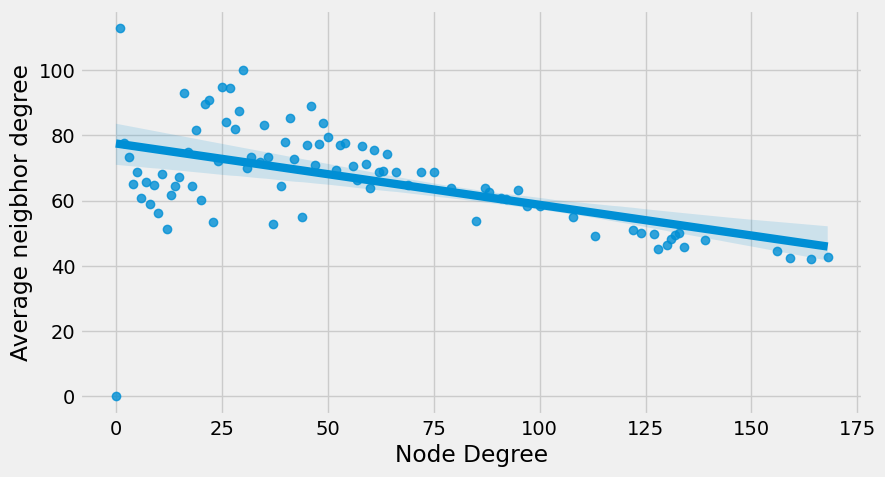

In [41]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(9,5))

sns.regplot(x=degree,y=avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [43]:
nx.number_connected_components(G)

6

In [51]:
S = nx.connected_components(G)

for comp in list(S):
    print(comp)

for comp in list(S):
    norte = 0
    for airp in comp:
        #if nx.get_node_attributes(G, 'region')[airp] == 'NORTE':
        norte += 1
    print(norte)

{'SSCN', 'SWLF', 'SWJV', 'SBSV', 'SBOI', 'SBSR', 'SBBE', 'SIFC', 'SBPJ', 'SWXM', 'SBCH', 'SNOB', 'SNBX', 'SSCT', 'SBPL', 'SBCP', 'SBDO', 'SBSN', 'SWPJ', 'SNDC', 'SWPQ', 'SNPV', 'SWEI', 'SDPA', 'SNBS', 'SBAX', 'SNLA', 'SNTI', 'SNRB', 'SSOE', 'SBCG', 'SBAV', 'SBMD', 'SBTD', 'SBTV', 'SNVC', 'SNSH', 'SBBV', 'SNXW', 'SWBE', 'SSUM', 'SBIC', 'SNRJ', 'SNMH', 'SNGN', 'SBFC', 'SDIM', 'SNFE', 'SDVE', 'SBJE', 'SNUO', 'SWFJ', 'SSOU', 'SSPG', 'SWGP', 'SWHG', 'SSKW', 'SBAE', 'SSUV', 'SNUB', 'SDH2', 'SSBG', 'SNFO', 'SBBU', 'SNJB', 'SBEK', 'SBJC', 'SSOK', 'SBTF', 'SDJA', 'SNLO', 'SNUU', 'SBFL', 'SIXE', 'SWRD', 'SSAP', 'SNAB', 'SWGN', 'SNTS', 'SBVH', 'SWNK', 'SBBZ', 'SBBQ', 'SSZR', 'SNBI', 'SWCQ', 'SWPF', 'SBTC', 'SBPO', 'SBCV', 'SBGO', 'SBQV', 'SDOU', 'SNTO', 'SBTG', 'SBMS', 'SWLB', 'SBJD', 'SWFE', 'SNPP', 'SBJA', 'SBGL', 'SDBK', 'SBSJ', 'SSDO', 'SWJQ', 'SBCA', 'SNQY', 'SNIG', 'SBTB', 'SNMX', 'SWKK', 'SBAC', 'SNCP', 'SNAR', 'SIBU', 'SSNC', 'SBCM', 'SWBG', 'SBPA', 'SDCG', 'SWUY', 'SWQR', 'SJTC', 'SIQE',